Import liberies mutiprocessing and queue 

In [14]:
from queue import PriorityQueue
import multiprocessing as mp

Solution for parallel Dijkstra:

*   Use Pool for multi processing
*   Use Manage.dict() as synchonized dict to store result. The key of disct is vertex and and the value are the distance from start node.
*   Tasks are devided by neighbor vertexes. When processing at each vertex, it get all neighbor vertexs, check each vertex is visted before. If vertex is visted, ignore it. If not, we will create a task and submit it to pool and wait all tasks to be finished.

*   Task responsibility is updating label(stored in Manage.dict) based on the distance, and return a tuple (distance, vertex)

*   When tasks at vertexs finished, we will get tasks result (distance, vertex) and put to PriorityQueue.

*  Afterthat, we will pop next vertex in PriorityQueue to process util queue is empty







In [15]:
class Graph:
   def __init__(self):
        self.vertexes = []
        self.visited = []
        self.edges = [[]]


   def addVertex(self, v):
        self.vertexes.append(v)
        newRow = []
        self.edges.append(newRow)
        for i in range(len(self.vertexes)):
            self.edges[i].append(0)

        for i in range(len(self.vertexes)):
            newRow.append(0)

   def addEdge(self, x, y, weight):
        self.edges[x][y] = weight
        self.edges[y][x] = weight

   def findBestPathParallel(self, start):
        pool = mp.Pool(mp.cpu_count())
        path = mp.Manager().dict()
        for v in self.vertexes:
            path[v] = float('inf')

        path[start] = 0

        priority_queue = PriorityQueue()
        priority_queue.put((0, start))

        vertexes_to_updated = []
        while not priority_queue.empty():
            (dist, current_vertex) = priority_queue.get()
            self.visited.append(current_vertex)
            vertexes_to_updated.clear()

            for neighbor in self.vertexes:
                if self.edges[current_vertex][neighbor] == 0:
                    continue
                if neighbor in self.visited:
                    continue
                vertexes_to_updated.append(pool.apply_async(self.updateLabel, (path, current_vertex, neighbor)))
            for pair in vertexes_to_updated:
                if pair.get()[0] != 0:
                    priority_queue.put(pair.get())
        #
        pool.close()
        pool.join()

        return path


   def updateLabel(self, path, current_vertex, neighbor ):
      distance = self.edges[current_vertex][neighbor]
      old_cost = path[neighbor]
      new_cost = path[current_vertex] + distance
      if new_cost < old_cost:
          path[neighbor] = new_cost #update label
          return new_cost, neighbor
      return 0, neighbor

    

Test
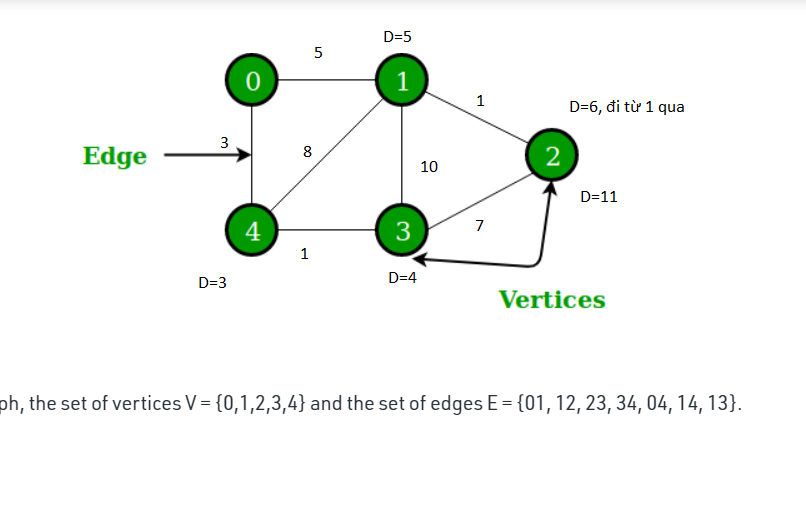

**Analysis**


*   The process runs parallelly when updating neighbor label at one vertext at at the same time.
*   Update or pop vertex from PriorityQueue to decides what next vertex to handle is still running sequentialy.
*   Breaking the tasks this way is suibtable for the graph that has many vertexs have  high degree




In [16]:
g = Graph()

g.addVertex(0)
g.addVertex(1)
g.addVertex(2)
g.addVertex(3)
g.addVertex(4)
g.addEdge(0, 1, 5)
g.addEdge(0, 4, 3)
g.addEdge(1, 2, 1)
g.addEdge(1, 3, 10)
g.addEdge(1, 4, 8)
g.addEdge(2, 3, 7)
g.addEdge(3, 4, 1)


if __name__ == '__main__':
    print(g.findBestPathParallel(0))


{0: 0, 1: 5, 2: 6, 3: 4, 4: 3}
